# Practical work 8: Split and Merge

In this practical work, we implement and test the split and merge algorithm.

In [1]:
### Usefull libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Data
img_test = np.full((64,64),150,dtype=np.uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = np.array(Image.open('img/angiogra.png'))
cam = np.array(Image.open('img/cameraman.png'))
muscle = np.array(Image.open('img/muscle.png'))
prisme = np.array(Image.open('img/prisme.png'))
seiche = np.array(Image.open('img/seiche.png'))

### Usefull functions
def neighbors(b,K):
    """ blockStat*list[blockStat]->list[blockStat]
        returns the list of neighbors of b and elements of K 
    """
    def belongsTo(x,y,a):
        """ int*int*BlockStat -> bool 
            Test if pixel (x,y) belongs to block a 
        """
        return x>=a[0] and y>=a[1] and x<a[0]+a[2] and y<a[1]+a[3]
    def areNeighbors(a,b):
        """ BlockStat**2 -> bool
            Test if a and b are neighbors
        """
        if a[2]>b[2] and a[3]>b[3]:
            a,b=b,a
        x,y = a[0]+a[2]//2,a[1]+a[3]//2
        return belongsTo(x+a[2],y,b) or belongsTo(x-a[2],y,b) or belongsTo(x,y+a[3],b) or belongsTo(x,y-a[3],b)
    N = []
    for n in K:
        if areNeighbors(b,n):
            N.append(n)
    return N

def imshow(I, title=None, size=500, axis=False):
    """ display an image, with title, size, and axis """
    plt.figure(figsize=(size//80, size//80))
    plt.gray()
    plt.imshow(I)
    if not axis: plt.axis('off')
    if title: plt.title(title)
    plt.show()

## Exercise 1

### Question 1
Write the recursive function ``split()`` discussed in tutorial work. 
It takes as input the image, a region, a predicate, and a variable number of arguments. 
The region is a Python formal type ``Block`` defined by:
```python
type Block = tuple[int**4]
```
The function ``split()`` returns a quadtree, a Python formal type, recursivelly defined by:
```python
type QuadTree = list[(QuadTree**4|Block)] 
```

The predicate is a Python function with the following signature:
```python
Array*Block*...->bool
```
It can take a variable number of parameters which correspond to the parameters required by the predicate.

In [98]:
# type Block = tuple[int**4]
# type QuadTree = list[(QuadTree**4|Block)] 

def split(I,reg,pred,*args):
    """ Array*Block*(Array*Block*...->bool)*... -> 4-aire
        Performs a quadtree splitting of image I drived by a predicate
    """
    # notre limite de séparation des régions
    Imin = 8
    
    x, y, n, m = reg
    if pred(I, reg, *args) and n > Imin and m >Imin :
        n2, m2 = n//2, m//2
        NO = split(I, (x, y, n2, m2), pred, *args)
        NE = split(I, (x, y+m2, n2, m2), pred, *args)
        SO = split(I, (x+n2, y, n2, m2), pred, *args)
        SE = split(I, (x+n2, y+m2, n2, m2), pred, *args)
        return [NO, NE, SO, SE]
    return [reg]

### Question 2
Write the function ```predsplit(I,B,*args)``` with signature:
```python
Array*Block*... -> bool
```
that returns True if the standard deviation of image ``I`` computed in region ``B`` is greater than the first value of argument ``*args`` (it can be accessed simply by ``*args[0]``).

In [3]:
def predsplit(I,reg,*args):
    """ Array*Block*... -> bool
    """ 
    x, y, n, m = reg
    return I[x:x+n, y:y+m].std() > args[0]

### Question 3
Write the function ``listRegions()`` which applies a depth-first search on the quadtree given as parameter, and returns the list of the leaves of the quadtree. 

Some recalls about lists in Python;
 - Initialization: `L = []` (empty list)
 - Add a element `a` into a list `L`: `L.append(a)`

In [4]:
def listRegions(L):
    """ QuadTree -> list[Block]
    """
    R = []
    if len(L) == 1:      # si l'élément est de taille 1, alors c'est une feuille
        R.append(L[0])
    else:                # dans le cas contraire on cherche plus profond dans notre arbre
        R.extend(listRegions(L[0]))
        R.extend(listRegions(L[1]))
        R.extend(listRegions(L[2]))
        R.extend(listRegions(L[3]))
        
    return R

### Question 4
Test your codes on the synthetic image ``img_test`` seen in tutorial work. Print the value returned by ``split()`` as well as the one returned by ``listRegions()``. 

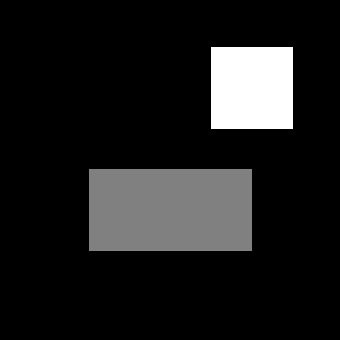

Resultats de Split():  [[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]] 

Resultats de listRegion():  [(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]


In [5]:
img_test = np.zeros((64, 64))+ 50
img_test[32:48,32:48] += 50
img_test[32:48,16:32] += 50
img_test[8:24,40:56] += 100
imshow(img_test)

r = (0,0,img_test.shape[0],img_test.shape[1])
resSplit = split(img_test,r,predsplit,0)
listOfRegions = listRegions(resSplit)

print("Resultats de Split(): ",resSplit,"\n")
print("Resultats de listRegion(): ",listOfRegions)

### Question 5
Write the function ```drawRegions(L,I)``` which takes as arguments a list of regions, an image, and returns an image  where the boundaries of each region have been traced with red color. Indication: the returned image is a hypermatrix of dimension 3, the third dimension is of size 3 and encodes the red, green and blue components of a RGB colorspace. Test the function on the previous example.

In [13]:
def drawRegions(L,I):
    """ list[Block]*Array -> Array
        parcours de la liste dessin des régions 
    """
    o, p = I.shape
    #On définie l'array de bonne dimention pour acceuillir les couleurs et de la taille de notre image
    RGB = np.zeros((o,p,3),dtype=np.int16)
    #Recuperation des nuances de gris de notre image à traité
    RGB[:,:,0] = RGB[:,:,1] = RGB[:,:,2] = I
    for i in range(len(L)):
        x,y,n,m = L[i]
        #affiche les limites entres regions et oppacifie les zones où les couleurs
        #se superposent.
        RGB[x,y:y+m,0],RGB[x,y:y+m,1],RGB[x,y:y+m,2] = 255, 0, 0
        RGB[x:x+n,y,0],RGB[x:x+n,y,1],RGB[x:x+n,y,2] = 255, 0, 0
        
        #permet d'afficher les lignes de séparations aux extrémités droites.
        if x+n == o:
            RGB[x+n-1,y:y+m,0] = 255
        if y+m == o:
            RGB[x:x+n,y+m-1,0] = 255
    
    return RGB

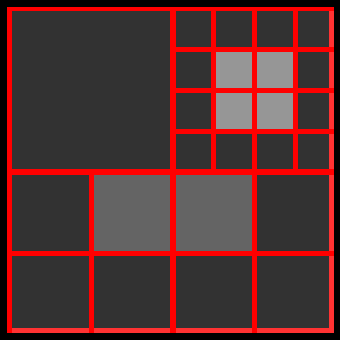

In [14]:
Dr = drawRegions(listOfRegions,img_test) 
imshow(Dr)

### Question 6
Add a Gaussian noise with standard deviation 5 to the image ``img_test``. 
Apply the quadtree splitting on the noisy image by adjusting the threshold to obtain the same result as in the previous question. 
Which threshold value should be chosen? Does this make sense to you?

Hint: use the Numpy function ``random.randn()`` which generates random values according to a normal distribution (Gaussian distribution of null mean and variance 1). To obtain realizations of a Gaussian distribution of standard deviation $\sigma$, it is sufficient to multiply by $\sigma$ the realizations of a normal distribution. 

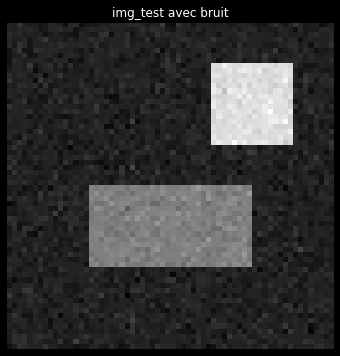

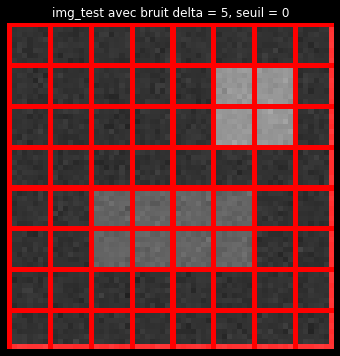

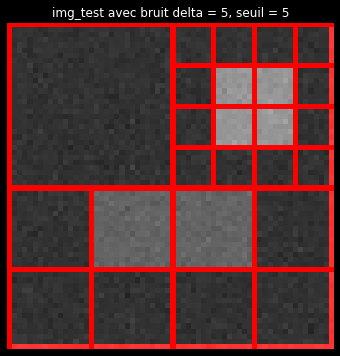

In [7]:
from numpy import random

gaussNoise = np.int32(np.random.randn(img_test.shape[0],img_test.shape[1]) * 5)
#print(gaussNoise)
img_gauss = img_test+gaussNoise
imshow(img_gauss,"img_test avec bruit")
resSplitG = split(img_gauss,r,predsplit,0)
listOfRegionsG = listRegions(resSplitG)
imshow(drawRegions(listOfRegionsG,img_gauss),"img_test avec bruit delta = 5, seuil = 0" )

resSplitG = split(img_gauss,r,predsplit,5)
listOfRegionsG = listRegions(resSplitG)
imshow(drawRegions(listOfRegionsG,img_gauss),"img_test avec bruit delta = 5, seuil = 5" )

# Interpretation 
**Avec un seuil de 0, le bruit gaussien fait que `predsplit` ne split aucune des régions comme précédement car l'écart type entre les valeurs des régions n'est pas nul. Il nous faut donc ajuster le seuil en fonction afin que l'écart type correspond a celui du bruit gaussien. Avec un bruit gaussien d'écart type de 5 les valeur de pixel peuvent etre $\pm 5$, on ajuste le seuil à un tolérence de 5 pour retrouver le résultat**

## Exercise 2

Experiment the split algorithm on the 4 natural images provided. For each image try to find the threshold that seems to you visually the best. Display the number of regions obtained after splitting.

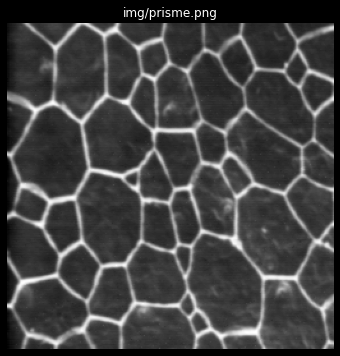

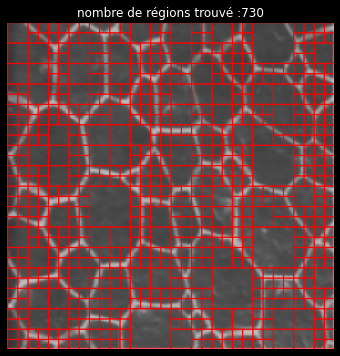

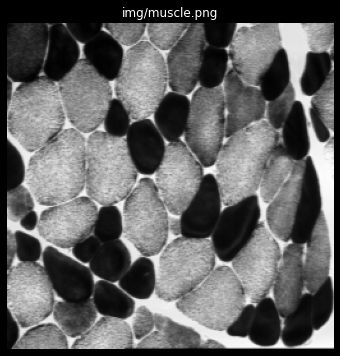

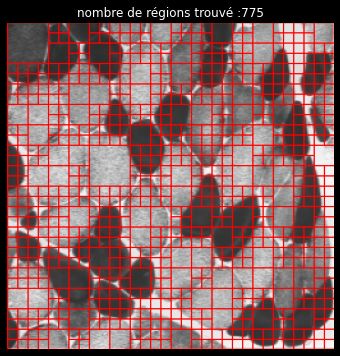

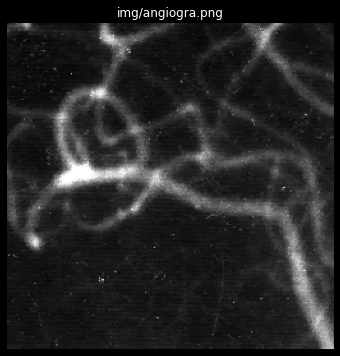

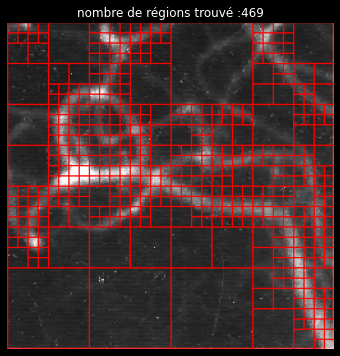

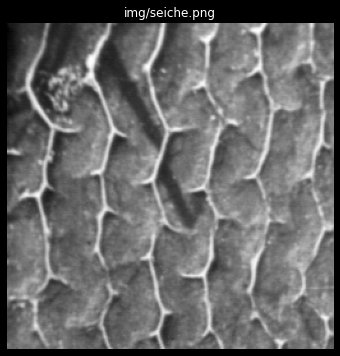

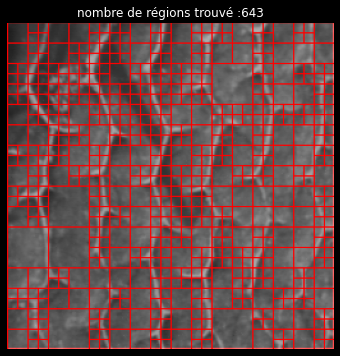

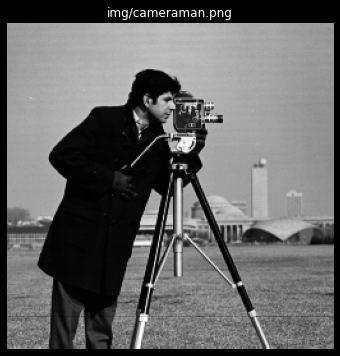

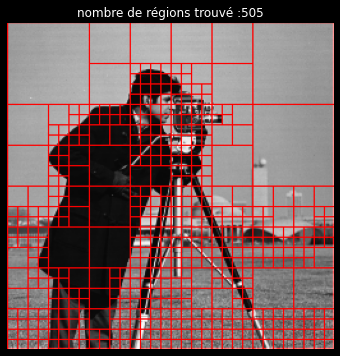

In [8]:
def Split4Exo2(filename,threshold):
    "Fonction addapter pour l'affichage des régions pour les images de nuances grisse"
    image = np.array(Image.open(filename))
    imshow(image,filename)
    r = (0,0,image.shape[0],image.shape[1])
    listOfRegions = listRegions(split(image,r,predsplit,threshold))
    imshow(drawRegions(listOfRegions,image),"nombre de régions trouvé :" 
           + str(len(listOfRegions)))

Split4Exo2("img/prisme.png",15)
Split4Exo2("img/muscle.png",20)
Split4Exo2("img/angiogra.png",13)
Split4Exo2("img/seiche.png",13)

Split4Exo2("img/cameraman.png",15)

## Exercise 3
### Question 1
Modify the function ``listRegions(L)`` to make it a function ``listRegionsStat(L,I)`` which computes the list of leaves of the quadtree ``L``. Each element of this list will be enriched with three scalar values: the first being the size, the second the mean and the third the variance of pixel values of the block in the image ``I``. This function then returns a list whose elements have the following formal type:
```python
type BlockStat = tuple[int**4,int,float**2]
```

The first four values are those of the ``Block`` type, the fifth is the size of the block (in number of pixels) and the last two values are the mean and variance calculated over the region.

In [9]:
# type BlockStat = tuple[int**4,int,float**2]

def listRegionsStat(L,I):
    """ QuadTree*Array -> list[BlockStat] """
    R = []
    if len(L) == 1: #Si l'élément est de taille 1 alors il s'agit d'une feuille.
        tmpBlock = L[0]
        x, y, n, m =tmpBlock
        size = (n*m)
        mean = I[x:x+n,y:y+m].mean()
        var  = I[x:x+n,y:y+m].var()
        R.append((x,y,n,m, size, mean, var))
    else:           #Sinon On cherche plus profond dans notre arbre et on ajoute les feuille trouvés
        R.extend(listRegionsStat(L[0],I))
        R.extend(listRegionsStat(L[1],I))
        R.extend(listRegionsStat(L[2],I))
        R.extend(listRegionsStat(L[3],I))
        
    return R
ListStat = listRegionsStat(resSplit,img_test)
print(ListStat)

[(0, 0, 32, 32, 1024, 50.0, 0.0), (0, 32, 8, 8, 64, 50.0, 0.0), (0, 40, 8, 8, 64, 50.0, 0.0), (8, 32, 8, 8, 64, 50.0, 0.0), (8, 40, 8, 8, 64, 150.0, 0.0), (0, 48, 8, 8, 64, 50.0, 0.0), (0, 56, 8, 8, 64, 50.0, 0.0), (8, 48, 8, 8, 64, 150.0, 0.0), (8, 56, 8, 8, 64, 50.0, 0.0), (16, 32, 8, 8, 64, 50.0, 0.0), (16, 40, 8, 8, 64, 150.0, 0.0), (24, 32, 8, 8, 64, 50.0, 0.0), (24, 40, 8, 8, 64, 50.0, 0.0), (16, 48, 8, 8, 64, 150.0, 0.0), (16, 56, 8, 8, 64, 50.0, 0.0), (24, 48, 8, 8, 64, 50.0, 0.0), (24, 56, 8, 8, 64, 50.0, 0.0), (32, 0, 16, 16, 256, 50.0, 0.0), (32, 16, 16, 16, 256, 100.0, 0.0), (48, 0, 16, 16, 256, 50.0, 0.0), (48, 16, 16, 16, 256, 50.0, 0.0), (32, 32, 16, 16, 256, 100.0, 0.0), (32, 48, 16, 16, 256, 50.0, 0.0), (48, 32, 16, 16, 256, 50.0, 0.0), (48, 48, 16, 16, 256, 50.0, 0.0)]


### Question 2
In the remainder, the formal type is considered:
```python
type Region = list[BlocStats]
```
A region, as seen during the tutorial work, is therefore a list of blocks. Write the predicate ``predmerge(b,R,*args)`` as seen in tutorial work. This function returns ``True`` if the ``b`` block should merge into the ``R`` region. If a merge happens, then the first item of ``R`` will have its statistics updated to describe the statistics of the region ``R`` merged with `b`.

In [80]:
def predmerge(b,R,*args):
    """ BlocsStat*Region*... -> bool 
        If merge, R[0] is modified
    """
    #dimension des blocks 'x,y,n,m' ; la taille 's' ainsi que la moyenne 'me' et la variance 'v'
    _,_,_,_,s1,mu1,v1 = b
    x,y,n,m,s2,mu2,v2 = R[0]
    # if abs(mu1-mu2) < args[0]:
    #     #update of R[0] if merge
    #     sr = s1 +s2
    #     mr =  (s1 * mu1 + s2 * mu2)/sr
    #     vr = np.sqrt(1/(s1 + s2 ) * (s1 *(mu1**2 + v1**2) + s2 *(mu2**2 + v2**2) - mr**2))
    #     R[0] = (x2,y2,n2,m2,sr,mr,vr)
    #     return True 
    # return False

    sr = s1 +s2
    mu =  (s1 * mu1 + s2 * mu2)/sr

    # vr = (s1 * (v1 + mu1**2) + s2 * (v2 + mu2**2)) / n - mu**2
    vr = np.sqrt(1/(s1 + s2 ) * (s1 *(mu1**2 + v1**2) + s2 *(mu2**2 + v2**2) - mu**2))
    # vr = (s1 *(mu1**2 + v1**2) + s2 *(mu2**2 + v2**2) - mu**2) / n

    # print(f'v = {np.sqrt(vr)} < {args[0]**2}')

    # if vr < args[0]**2:

    if abs(mu1-mu2) < args[0]:
        R[0] = (x,y,n,m,sr,mu,vr)
        return True 
    return False


print(predmerge((0, 0, 32, 32, 1024,50.0, 0.0),ListStat,10))
print(ListStat)

True
[(0, 0, 32, 32, 3072, 50.0, 64.53711383769807), (0, 32, 8, 8, 64, 50.0, 0.0), (0, 40, 8, 8, 64, 50.0, 0.0), (8, 32, 8, 8, 64, 50.0, 0.0), (8, 40, 8, 8, 64, 150.0, 0.0), (0, 48, 8, 8, 64, 50.0, 0.0), (0, 56, 8, 8, 64, 50.0, 0.0), (8, 48, 8, 8, 64, 150.0, 0.0), (8, 56, 8, 8, 64, 50.0, 0.0), (16, 32, 8, 8, 64, 50.0, 0.0), (16, 40, 8, 8, 64, 150.0, 0.0), (24, 32, 8, 8, 64, 50.0, 0.0), (24, 40, 8, 8, 64, 50.0, 0.0), (16, 48, 8, 8, 64, 150.0, 0.0), (16, 56, 8, 8, 64, 50.0, 0.0), (24, 48, 8, 8, 64, 50.0, 0.0), (24, 56, 8, 8, 64, 50.0, 0.0), (32, 0, 16, 16, 256, 50.0, 0.0), (32, 16, 16, 16, 256, 100.0, 0.0), (48, 0, 16, 16, 256, 50.0, 0.0), (48, 16, 16, 16, 256, 50.0, 0.0), (32, 32, 16, 16, 256, 100.0, 0.0), (32, 48, 16, 16, 256, 50.0, 0.0), (48, 32, 16, 16, 256, 50.0, 0.0), (48, 48, 16, 16, 256, 50.0, 0.0)]


### Question 3
Using `predmerge()` and `neighbors()` functions, given at the beginning of the notebook, write the function ``merge()`` discussed in tutorial work (exercise 7.6).

Recalls on Python lists:
- Remove an element `a` from a list `L`: `L.remove(a)`
- Test if `a` belongs to a list `L`: `a in L` 
- Iterate the elements of a list `L`: `for a in L:`
- Access to an element of a list: as with numpy arrays

In [82]:
def merge(S,I,pred,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K, L= listRegionsStat(S,I), []
    while K != []:
        b = K.pop(0)
        R = [b]
        #print(b,K)
        N = neighbors(b,K)
        #print(b)
        #print(N,"\n")
        for bn in N:
            if(pred(bn,R,*args)):
                K.remove(bn)
                R.append(bn)
                for n in neighbors(bn,K):
                    if(n not in N):
                        N.append(n)
        L.append(R)
    return L         

### Question 4
Test the previous functions using the synthetic image `img_test`. In particular, check that merge() returns a list of 3 elements (i.e. 3 regions).

In [83]:
r = (0,0,img_test.shape[0],img_test.shape[1])
QT = split(img_test,r ,predsplit, 0)
M = merge(QT,img_test,predmerge, 10)
print(len(M))
print(M)
assert len(M) == 3

3
[[(0, 0, 32, 32, 3328, 50.0, 168.0943459329176), (0, 32, 8, 8, 64, 50.0, 0.0), (8, 32, 8, 8, 64, 50.0, 0.0), (16, 32, 8, 8, 64, 50.0, 0.0), (24, 32, 8, 8, 64, 50.0, 0.0), (32, 0, 16, 16, 256, 50.0, 0.0), (0, 40, 8, 8, 64, 50.0, 0.0), (24, 40, 8, 8, 64, 50.0, 0.0), (48, 0, 16, 16, 256, 50.0, 0.0), (0, 48, 8, 8, 64, 50.0, 0.0), (24, 48, 8, 8, 64, 50.0, 0.0), (48, 16, 16, 16, 256, 50.0, 0.0), (0, 56, 8, 8, 64, 50.0, 0.0), (24, 56, 8, 8, 64, 50.0, 0.0), (32, 48, 16, 16, 256, 50.0, 0.0), (48, 32, 16, 16, 256, 50.0, 0.0), (8, 56, 8, 8, 64, 50.0, 0.0), (16, 56, 8, 8, 64, 50.0, 0.0), (48, 48, 16, 16, 256, 50.0, 0.0)], [(8, 40, 8, 8, 256, 150.0, 224.4132975672342), (8, 48, 8, 8, 64, 150.0, 0.0), (16, 40, 8, 8, 64, 150.0, 0.0), (16, 48, 8, 8, 64, 150.0, 0.0)], [(32, 16, 16, 16, 512, 100.0, 99.90229601966114), (32, 32, 16, 16, 256, 100.0, 0.0)]]


### Question 5
Write a function ``regions(LR,shape)`` that takes as arguments a list of regions (such as returned by the function ``merge()``) and an image size, and returns an image of the regions. Each region will be colored with the gray level corresponding to the average of the region. The ``shape`` parameter gives the size of the image to be produced. 

Test the function on the previous example.

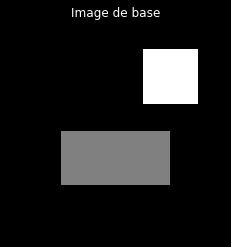

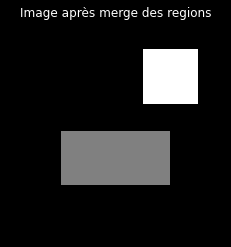

In [84]:
def regions(LR,shape):
    """ list[Region]*tuple[int,int] -> Array """
    R = np.zeros(shape)
    
    for i in range(len(LR)):
        for j in range(len(LR[i])):
            x,y,n,m,s,me,v = LR[i][j]
            R[x:x+n,y:y+m] = me
    return R

r = (0,0,img_test.shape[0],img_test.shape[1])
QT = split(img_test,r ,predsplit, 0)
M = merge(QT,img_test,predmerge, 5)


plt.imshow(img_test)
plt.title("Image de base")
plt.axis('off')
plt.show()
            
plt.imshow(regions(M,img_test.shape))
plt.title("Image après merge des regions")
plt.axis('off')
plt.show()


## Exercise 4: experiments
### Question 1
Test the function ``merge()`` on the images ``angio``, ``cam``, ``muscle``, ``prisme`` and ``seiche``. Try to produce the best segmentations.

In [43]:
def mergeAndPrint(filename,threshold):
    """Permet de visualiser les régions d'une image (sans couleurs) """
    image = np.array(Image.open(filename))
    imshow(image,filename)
    r = (0,0,image.shape[0],image.shape[1])
    QT = split(image,r,predsplit,threshold)
    M = merge(QT,image,predmerge,threshold)
    plt.figure(figsize=(10,10))
    plt.imshow(regions(M,image.shape))
    plt.axis('off')
    plt.show()

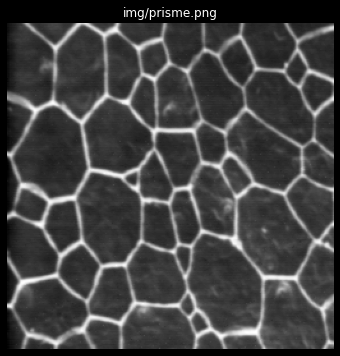

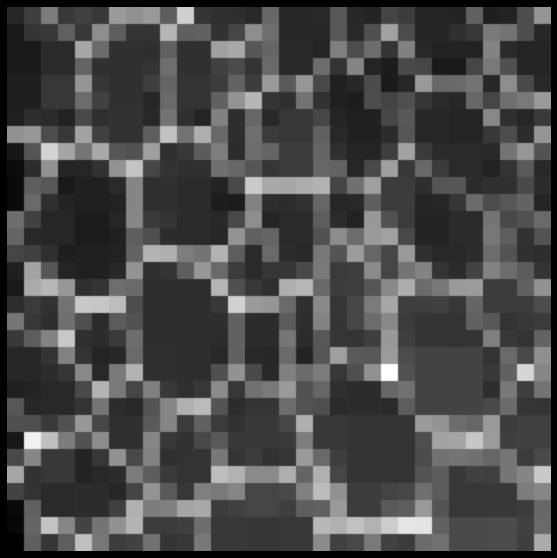

In [99]:
mergeAndPrint("img/prisme.png",10)

Le résultat ici semble correct, les démarquations du prisme sont bien visible et séparé par des zones de blanc.

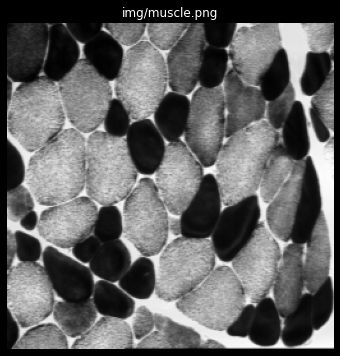

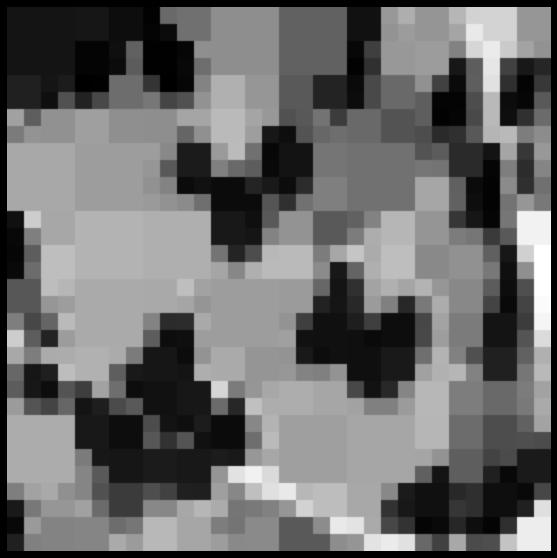

In [100]:
mergeAndPrint("img/muscle.png",30)

Pour le muscle, ce traitement nous permet de bien marquer les zones tachetés de noir. Cela peu etre très utile en médecine pour relever des zones de couleur "anormal" ou différente du reste de la masse corporel ou bien réaliser des statistiques sur la portion de certain tissue dans l'organisme.

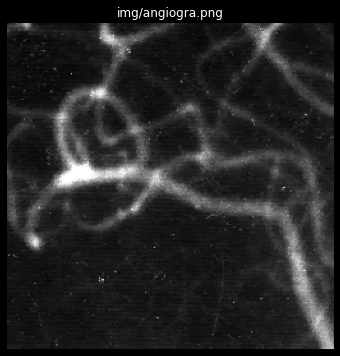

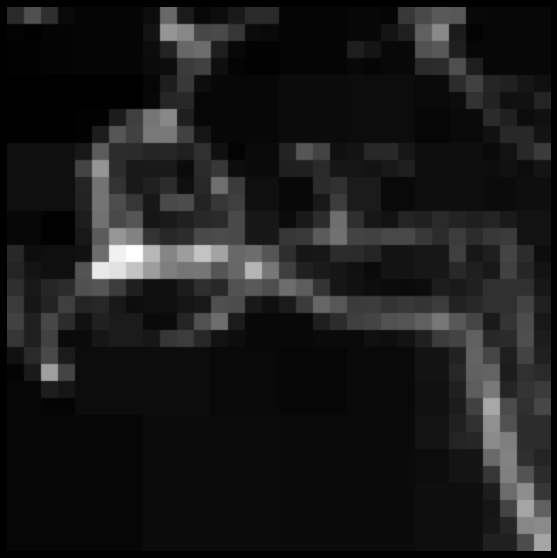

In [101]:
mergeAndPrint("img/angiogra.png",12)

On peu voir que le traitement ici peu servir a mettre en avant les zones où l'angiogra est le plus épais et nous débarasse des fils qui peuvent s'avéré superflu pour la tache que l'on souahite réaliser

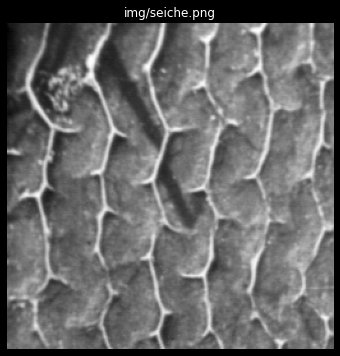

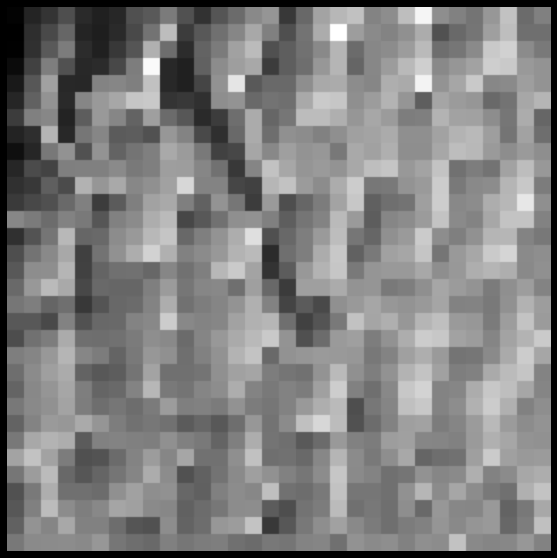

In [111]:
mergeAndPrint("img/seiche.png",0)

Sur cette délimitation des zones, on pourrais presque distinguer le paterne de l'image analyser. Sois le seuil du predmerge est erroner, sois le travail n'est pas adapter à l'image. ( Celon le seuil, les zone de la seiche sont plus ou moins bien délimité)

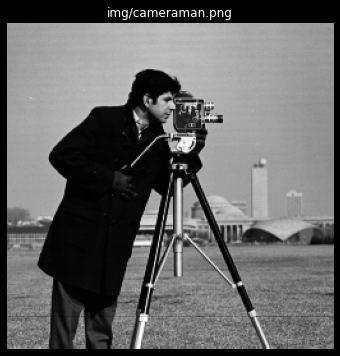

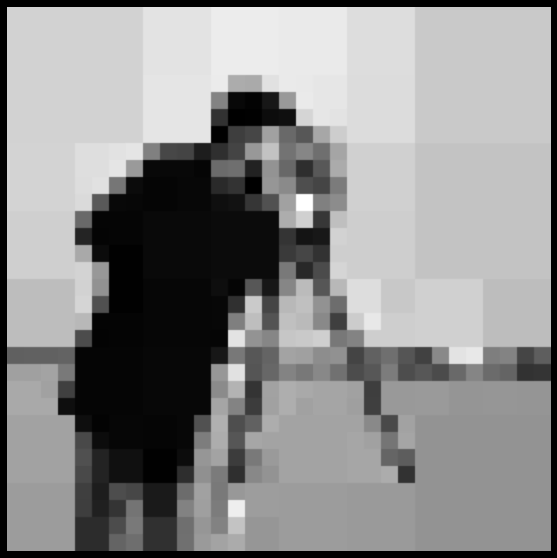

In [117]:
mergeAndPrint("img/cameraman.png",30)

Ici le marquage semble plutot net et nous permet de distinguer 4 régions importante de l'image de base: Le photographe, son appareil, le sol et le ciel.

### Question 2
The result of the merge algorithm highly depends on how you visit the regions. One can then sort the leaves of the quadtree, for example, from the smallest to the largest blocks, or the opposite (use the Python function ``sorted()``). 
The same question arises when calculating the set of neighbors of the merged region. Should they be sorted? If yes, according to which criteria? their size? their proximity? 
Obviously there is no universal answer but it should be adapted to each type of problem. 
Do some tests to see the influence of these sortings on the result of the merger.

In [119]:
def merge_small_to_large(S,I,pred,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions and inspect them to the smallest to the largest 
    """
    K, L= listRegionsStat(S,I), []
    #on trie notre arbre 
    K.sort(key=get_taille)
    while len(K) != 0:
        b = K.pop(0)
        R = [b]
        N = neighbors(b,K)
        for bn in N:
            if(pred(bn,R,*args)):
                K.remove(bn)
                R.append(bn)
                for n in neighbors(bn,K):
                    if(n not in N):
                        N.append(n)
        L.append(R)
    return L  

def merge_large_to_small(S,I,pred,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions and inspect them to the largest to the smallest
    """
    K, L= listRegionsStat(S,I), []
    #on trie notre arbre que l'on inverse ensuite 
    K.sort(key=get_taille)
    K.reverse()
    while len(K) != 0:
        b = K.pop(0)
        R = [b]
        N = neighbors(b,K)
        for bn in N:
            if(pred(bn,R,*args)):
                K.remove(bn)
                R.append(bn)
                for n in neighbors(bn,K):
                    if(n not in N):
                        N.append(n)
        L.append(R)
    return L  

#permet de filter uniquement sur la taille des feuilles
def get_taille(leaf):
    #  le 5 element est la taille de la région
    return leaf[4]


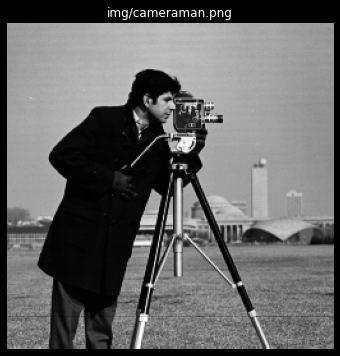

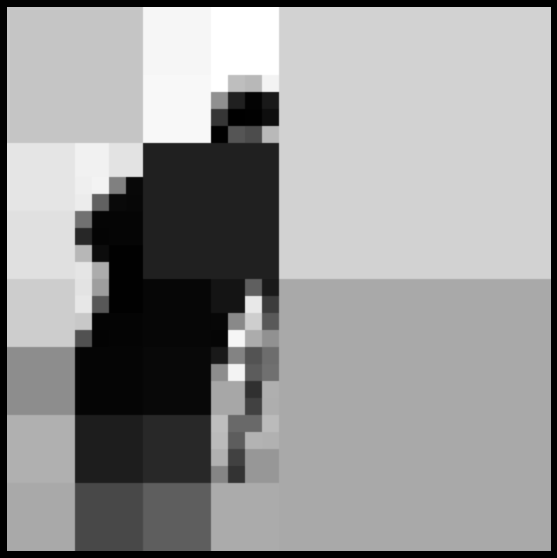

Avec trie des plus petites régions au plus grandes :


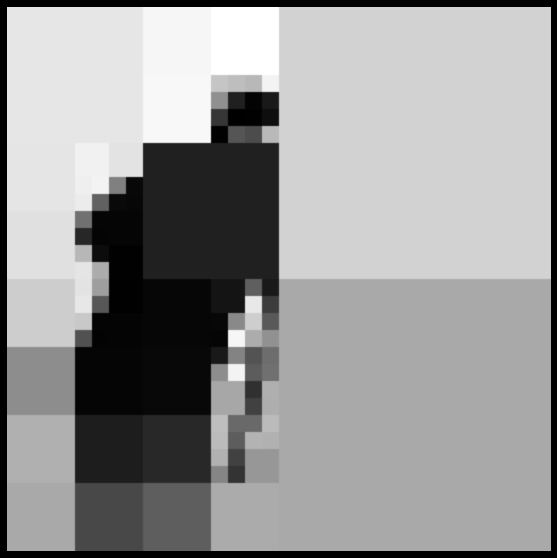

Avec trie des plus petites régions au plus grandes :


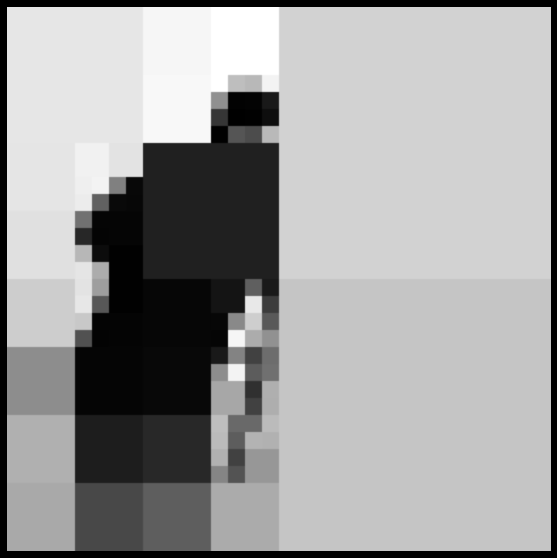

In [124]:
#résultat classique 
filename = "img/cameraman.png"
threshold = 50
image = np.array(Image.open(filename))
mergeAndPrint(filename,threshold)

#plus petites zones en premier

r = (0,0,image.shape[0],image.shape[1])
QT = split(image,r,predsplit,threshold)
M = merge_small_to_large(QT,image,predmerge,threshold)
print("Avec trie des plus petites régions au plus grandes :")

plt.figure(figsize=(10,10))
plt.imshow(regions(M,image.shape))
plt.axis('off')
plt.show()

#plus grandes zones en premier
r = (0,0,image.shape[0],image.shape[1])
QT = split(image,r,predsplit,threshold)
M = merge_large_to_small(QT,image,predmerge,threshold)
print("Avec trie des plus petites régions au plus grandes :")

plt.figure(figsize=(10,10))
plt.imshow(regions(M,image.shape))
plt.axis('off')
plt.show()



Il ne semble pas y avoir une grande différence entre les deux filtrages. Le plus probable est que la question n'a pas été correctement comprise ou bien que l'image n'est pas affecter par ce changement.

### Question 3 (bonus)
Imagine and experiment alternative predicates for both the split and the merge steps. It is possible to use edges-based predicates, and also to combine with variance-based predicates.


En utilisant la détéction de coins de Harris, on obtiendra les différents coins de nos régions. Puis avec la détection de bords vus lors du TME 5 on peux en théorie lier les points entre eux, pour obtenir nos régions ( on devrais avoir chaque coins et les autres coins auquel il est liée, puis on test l'appartenance de chaque pixel pour une régions selon sa position relative dans l'image). On peux ensuite afficher nos régions comme étant la moyenne de la valeur de chaque pixel de la régions ( on supose que des zones divisé par des bordures sont homogène ).
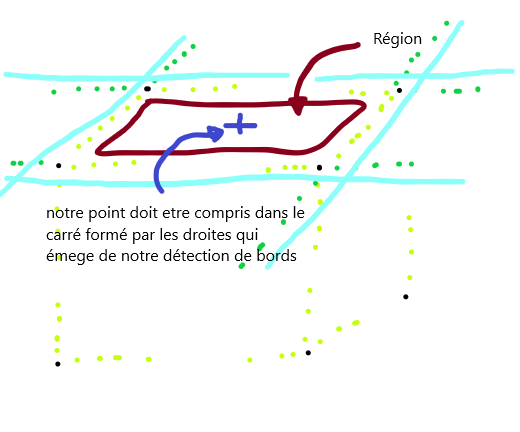

Dans la suite, j'ai tenté d'implémenter une version de merge qui fonctionnerais avec des couleurs (Sans succès, en effet les calculs pour la moyenne et la variance ne semble plus fonctionner correctement ).

(1152, 2048, 3)


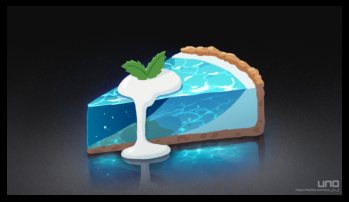

In [ ]:
img_color = np.array(Image.open("img_color.jpg"))
print(img_color.shape)
imshow(img_color)

In [ ]:
def mergeAndPrintfromImage(image,threshold):
    """Permet de visualiser les régions d'une image (sans couleurs) """
    imshow(image)
    r = (0,0,image.shape[0],image.shape[1])
    QT = split(image,r,predsplit,threshold)
    M = merge(QT,image,predmerge,threshold)
    regions(M,image.shape)

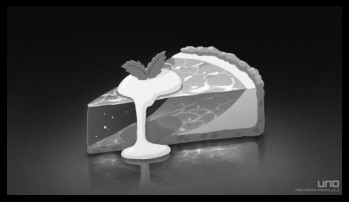

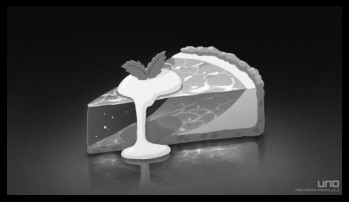

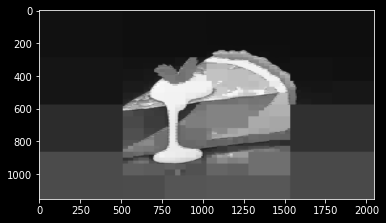

In [ ]:
img_gray=np.dot(img_color[...,:3], [0.299, 0.587, 0.114])
imshow(img_gray)
mergeAndPrintfromImage(img_gray,20)

In [ ]:
QT = split(img_gray,(0,0,img_gray.shape[0],img_gray.shape[1]),predsplit,20)
M = merge(QT,img_gray,predmerge, 20)

In [ ]:
meanColor = np.zeros((len(M),3))
for i in range(len(M)):
    for j in range(len(M[i])):
        x,y,n,m,s,me,v = M[i][j]
        meanColor[i] = np.sum(img_color[x:x+n,y:y+m],axis=(0,1))/s
        meanColor = meanColor.astype(int)
meanColor

array([[ 30,  30,  33],
       [ 34,  51,  36],
       [ 51, 169, 197],
       ...,
       [106, 232, 244],
       [142, 242, 249],
       [ 35, 166, 197]])

In [ ]:
def regionsColor(LR,Color,shape):
    """ list[Region]*tuple[int,int] -> Array """
    R = np.zeros(list(shape) + [3])
    
    for i in range(len(LR)):
        for j in range(len(LR[i])):
            x,y,n,m,s,_,v = LR[i][j]
            R[x:x+n,y:y+m] = Color[i]
   
    #je pense qu'il est ici préférable d'utiliser plt.show() ici car les résultats peuvent etre affectés par imshow()
    plt.imshow((R).astype(np.uint8))
    plt.axis('off')
    plt.show() 

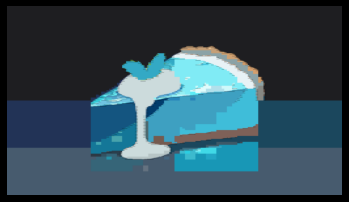

In [ ]:
regionsColor(M,meanColor,img_gray.shape)

In [ ]:
def mergeAndPrintfromImageColor(filename,threshold):
    """Permet de visualiser les régions d'une image (avec couleurs) """
    img_color = np.array(Image.open(filename))
    img_gray=np.dot(img_color[...,:3], [0.299, 0.587, 0.114])
    r = (0,0,img_gray.shape[0],img_gray.shape[1])
    QT = split(img_gray,r,predsplit,threshold)
    M = merge(QT,img_gray,predmerge,threshold)
    meanColor = np.zeros((len(M),3))
    for i in range(len(M)):
        for j in range(len(M[i])):
            x,y,n,m,s,me,v = M[i][j]
            meanColor[i] = np.sum(img_color[x:x+n,y:y+m],axis=(0,1))/s
            meanColor = meanColor.astype(int)
    regionsColor(M,meanColor,img_gray.shape)

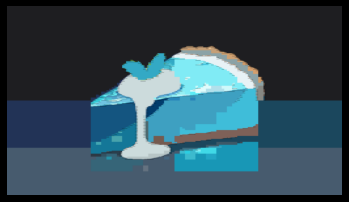

In [ ]:
mergeAndPrintfromImageColor("img_color.jpg",20)

In [ ]:
def listRegColor(L,I):
    """ QuadTree*Array -> list[BlockStat] """
    R = []
    if len(L) == 1: #Si l'élément est de taille 1 alors il s'agit d'une feuille.
        tmpBlock = L[0]
        x, y, n, m =tmpBlock
        size = (n*m)
        mean = [int(I[x:x+n,y:y+m,i].mean()) for i in range(3)]
        var  = [int(I[x:x+n,y:y+m,i].var()) for i in range(3)]
        R.append((x,y,n,m, size, mean, var))
    else:           #Sinon On cherche plus profond dans notre arbre et on ajoute les feuille trouvés
        R.extend(listRegColor(L[0],I))
        R.extend(listRegColor(L[1],I))
        R.extend(listRegColor(L[2],I))
        R.extend(listRegColor(L[3],I))
    return R
    

r = (0,0,img_color.shape[0],img_color.shape[1])
QT = split(img_color,r,predsplit,40)
LRC = listRegColor(QT, img_color)

In [ ]:
def predmergecolor(b,R,*args):
    """ BlocsStat*Region*... -> bool 
        If merge, R[0] is modified
    """
    #dimension des blocks 'x,y,n,m' ; la taille 's' ainsi que la moyenne 'me' et la variance 'v'
    x1,y1,n1,m1,s1,me1,v1 = b
    x2,y2,n2,m2,s2,me2,v2 = R[0]
    if abs(me1[0]-me2[0]) + abs(me1[1]-me2[1]) +abs(me1[2]-me2[2]) < args[0]:
        #update of R[0] if merge
        sr = s1 +s2
        mr = [int((1/(s1 + s2)) * (s1 * me1[i] + s2 * me2[i])) for i in range(3)]
        vr = [np.sqrt(1/(s1 + s2 ) * (s1 *(me1[i]**2 + v1[i]**2) + s2 *(me2[i]**2 + v1[i]**2) - mr[i]**2)) for i in range(3)]
        R[0] = (x2,y2,n2,m2,sr,mr,vr)
        return True 
    return False
        
    return R

In [ ]:
def merge_color(S,I,pred,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K, L= listRegColor(S,I), []
    while len(K) != 0:
        b, R = K[0], []
        K.remove(b)
        R.append(b)
        N = neighbors(b,K)

        for bn in N:
            if(predmergecolor(bn,R,*args)):
                K.remove(bn)
                R.append(bn)
                for n in neighbors(bn,K):
                    if(n not in N):
                        N.append(n)
        L.append(R)
    return L      

In [ ]:

def regions_color(LR,shape):
    """ list[Region]*tuple[int,int] -> Array """
    R = np.zeros(shape)
    
    for i in range(len(LR)):
        for j in range(len(LR[i])):
            x,y,n,m,s,me,v = LR[i][j]
            R[x:x+n,y:y+m] = me
   
    #print(R)
    plt.imshow(R)
    plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


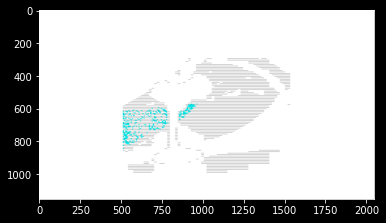

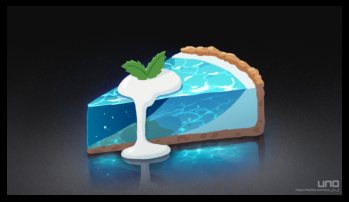

In [ ]:
M = merge_color(QT,img_color,predmerge,13)
regions_color(M,img_color.shape)
imshow(img_color)